In [96]:
import os
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
import yfinance as yf
from matplotlib import pyplot

In [97]:
ticker = 'CL=F' # stock ticker symbol: WTI Crude Oil
period = 'max' # time range to look at: all time
interval = '1d' # time interval for data collected: daily
data_s = 'Open' # Low, High, Open, Close, Volume

In [98]:
def get_hist(ticker, time, interval):
    tick = yf.Ticker(ticker)
    return tick.history(period=time, interval=interval)

In [99]:
# get historic data
df = get_hist(ticker, period, interval)

In [100]:
# reversing data so top is most recent
df = df.loc[::-1]

In [101]:
date = df.reset_index()['Date']

# add dates as dataframe columns
df['year'] = date.dt.year.values
df['month'] = date.dt.month.values
df['day'] = date.dt.day.values

# gets rid of datetime indexing
df = df.reset_index()
df = df.drop('Date', axis=1)

In [102]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,12065.099609,12178.553711,12024.142578,12158.729492,2207466000,0.0,0.0,2023,2,2
1,11573.139648,11904.019531,11500.330078,11816.320312,6336040000,0.0,0.0,2023,2,1
2,11398.580078,11586.009766,11398.370117,11584.549805,5695150000,0.0,0.0,2023,1,31
3,11512.339844,11553.309570,11388.540039,11393.809570,5122320000,0.0,0.0,2023,1,30
4,11470.469727,11691.889648,11470.269531,11621.709961,6243800000,0.0,0.0,2023,1,27


In [103]:
test = df.drop(df.tail(5300).index, inplace = False)
train = df
train_y = train[data_s]
train_X = train.drop(columns=data_s)
test_y = test[data_s]
test_X = test.drop(columns=data_s)

In [104]:
# dates = {
#     'year':[],
#     'month':[],
#     'day':[]
# }
# for i in range(5):
#     dates['year'] += [2023]
#     dates['month'] += [1]
#     dates['day'] += [25+i]
# future = pd.DataFrame.from_dict(dates)
# future

In [105]:
evalset = [(train_X, train_y), (test_X, test_y)]

In [106]:
# Instantiation
model = xg.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=123)

In [107]:
# Fitting the model
model.fit(train_X, train_y, eval_metric='logloss', eval_set=evalset)

[0]	validation_0-logloss:-103337.56751	validation_1-logloss:-167001.13985
[1]	validation_0-logloss:-104583.85506	validation_1-logloss:-169009.64569
[2]	validation_0-logloss:-105179.11110	validation_1-logloss:-169969.11496
[3]	validation_0-logloss:-105521.46843	validation_1-logloss:-170520.92178
[4]	validation_0-logloss:-105734.88438	validation_1-logloss:-170864.92796
[5]	validation_0-logloss:-105873.67518	validation_1-logloss:-171088.66567
[6]	validation_0-logloss:-105966.27334	validation_1-logloss:-171237.93644
[7]	validation_0-logloss:-106029.11270	validation_1-logloss:-171339.25635
[8]	validation_0-logloss:-106072.16713	validation_1-logloss:-171408.67351


C:\Users\oliver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:-106101.84349	validation_1-logloss:-171456.51359
[10]	validation_0-logloss:-106122.42320	validation_1-logloss:-171489.69440
[11]	validation_0-logloss:-106136.76985	validation_1-logloss:-171512.83185
[12]	validation_0-logloss:-106146.77687	validation_1-logloss:-171528.96319
[13]	validation_0-logloss:-106153.78676	validation_1-logloss:-171540.26719
[14]	validation_0-logloss:-106158.70219	validation_1-logloss:-171548.19114
[15]	validation_0-logloss:-106162.15065	validation_1-logloss:-171553.75854
[16]	validation_0-logloss:-106164.56604	validation_1-logloss:-171557.64951
[17]	validation_0-logloss:-106166.25395	validation_1-logloss:-171560.37793
[18]	validation_0-logloss:-106167.45349	validation_1-logloss:-171562.28062
[19]	validation_0-logloss:-106168.29048	validation_1-logloss:-171563.64131
[20]	validation_0-logloss:-106168.88310	validation_1-logloss:-171564.51118
[21]	validation_0-logloss:-106169.29607	validation_1-logloss:-171565.20948
[22]	validation_0-logloss:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [108]:
# Predict the model
yhat = model.predict(test_X)

In [109]:
# RMSE Computation
rmse = np.sqrt(MSE(test_y, yhat))

In [110]:

print("RMSE : % f" %(rmse))

RMSE :  14.964465


In [111]:
results = model.evals_result()

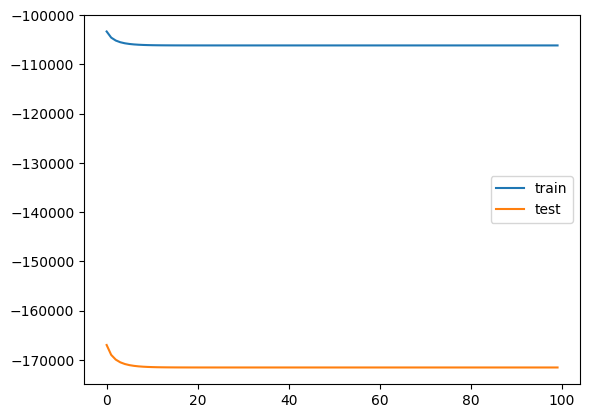

In [112]:
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [113]:
# todo:
# graph loss
# setup a prediction view method
# predict future
# make test set the last year instead of 5000
# run daily